<a name="toc"></a>
# Table of Contents

1.) [Imports](#imports)

2.) [Load Data](#load)

3.) [Introduction](#intro)

   - [Background](#background)

   - [Questionnaire](#questionnaire)

   - [Dataset](#dataset)
   
   - [Tracts](#tracts)
   
   - [County](#counties)
   
   - [States](#states)
   
4.) [General Focus](#general)

   - [Missing values - County](#nan_county)
   
   - [Missing values - Tract](#nan_tract)
   
   - [Nation as a Whole](#whole_nation)
   
   - [Correlation Maps](#gen_corr)

5.) [State Focus](#state)

   - [Population](#st_pop)
   
   - [Transportation](#st_trans)
   
   - [Unemployment](#st_unemploy)

6.) [Racial Focus](#race)
   
   - [Population and Representation](#race_pop)
   
   - [Unemployment](#race_unemploy)
   
   - [Correlation Map](#race_corr)

7.) [Numeric Focus](#numeric)

   - [Income](#nu_income)

   - [Commute times](#nu_commute)

8.) [Focus on Fun!](#fun)

   - [Gender imbalance](#fun_gender)

   - [Selected Counties](#fun_selected)

9.) [Resources](#resources)

10.) [Criticism](#criticism)

---
<a name="imports"></a>
# [^](#toc) <u>Imports</u>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()
%matplotlib inline

### Styling helpers

I found out about the color class from this [Stack Overflow question](https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python) (thanks [Boubakr](https://stackoverflow.com/users/1770999/boubakr)!)

In [2]:
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    fig = sns.barplot(data.values, data.index, ax=ax)
    for i, v in enumerate(data.values):
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, v, color='k', fontsize=14)
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

### Used to style Python print statements
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

---
<a name="load"></a>
# [^](#toc) <u>Load data</u>

In [3]:
county = pd.read_csv("../../data/census/census_county.csv")
tract = pd.read_csv("../../data/census/census_tract.csv")

### Remove all rows in tract with zero population

A population is essential for Census data.  Having looked at the tract data already, I noticed there are a sizeable number of rows completely missing a population.

Let's delete these rows because they carry no information

In [4]:
before_N = len(tract)
tract = tract.drop(tract[tract.TotalPop == 0].index)
after_N = len(tract)

print("Number of rows removed with zero population:", color.BOLD, before_N - after_N, color.END)

Number of rows removed with zero population:  690 


---
<a name="intro"></a>
# [^](#toc) <u>Introduction</u>

<a name="background"></a>
### [^](#toc) Background

Since 1790, the US governemt conducts a survey of the entire nation to understand the current distribution of the population.  Every citizen in the States receives a questionaire (see [questionaire below](#questionnaire)).

Around 1960, there began to be a greater demand for more data at regular intervals.  And after 45 years of discussion, planning, and allocation of funds, the US government expanded the Census Bureau to administer the American Community Survey (ACS).  There are a number of important differences in how the ACS and the 10-year Census are conducted.  The 10-year Census is required by everyone in the nation at the same time however the ACS is a rolling sample and sends out surveys to 295,000 addresses monthly (or 3.5 million per year) indefinitely. 

The purpose of this data is somewhat different and has sparked [some controversy].  The 10 year Census is a codified procedure that goes back to the forefathers and described in Article I, Section II of the US Constitution.  It's purpose is purely for redistricting and keeping the Electoral College updated with population shifts.  The ACS

As al

<a name="questionnaire"></a>
### [^](#toc) Questionnaire

The 2010 Census form ([photo](https://www.census.gov/history/pdf/2010questionnaire.pdf))

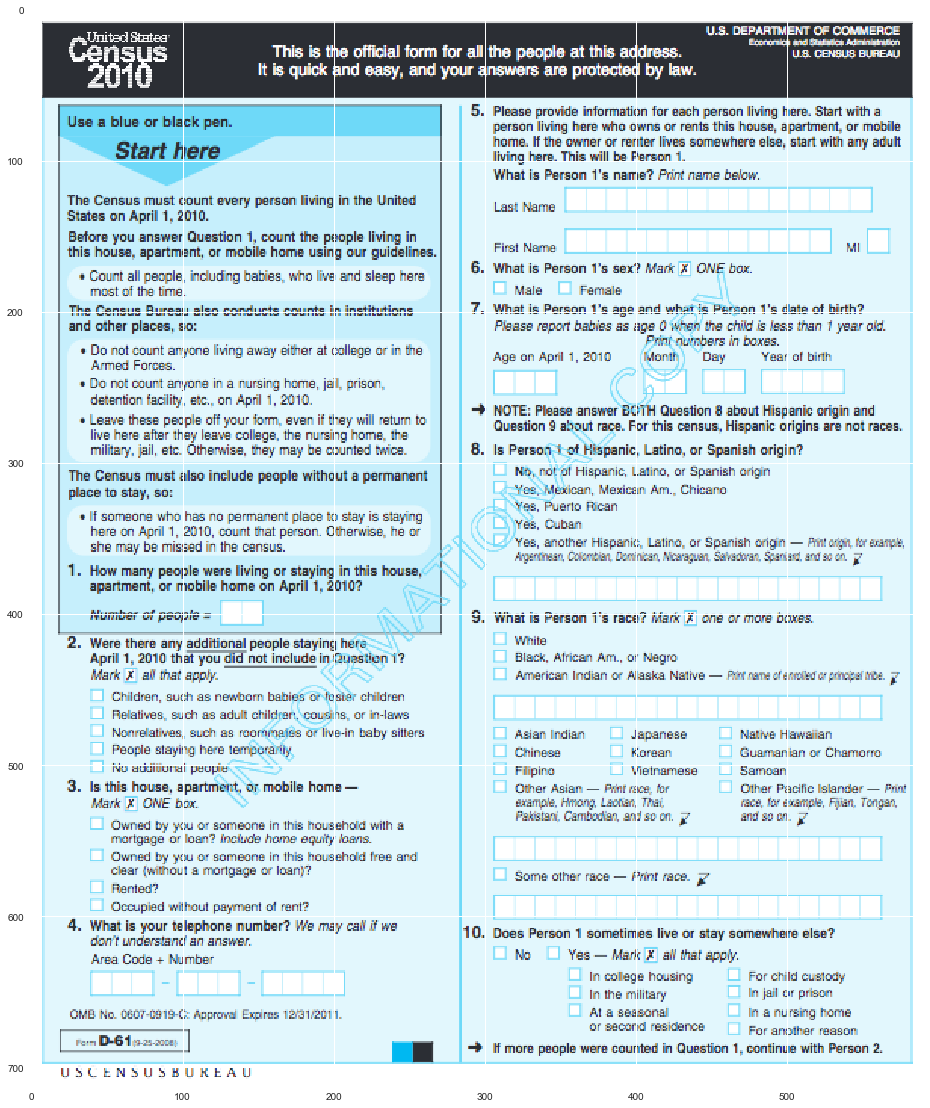

In [5]:
plt.figure(figsize=(16,20))
img=mpimg.imread('photos/census.png')
_ = plt.imshow(img)

<a name="dataset"></a>
### [^](#toc) Dataset

In the exact words of Kaggle user [Muon Neutrino](https://www.kaggle.com/muonneutrino), the individual who hosts this [dataset](https://www.kaggle.com/muonneutrino/us-census-demographic-data) on Kaggle

"""

The data here are taken from the DP03 and DP05 tables of the 2015 American Community Survey 5-year estimates. The full datasets and much more can be found at the American Factfinder [website](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml). Currently, I include two data files:

    1.) census_tract.csv: Data for each census tract in the US, including DC and Puerto Rico.
    1.) census_county.csv: Data for each county or county equivalent in the US, including DC and Puerto Rico.

The two files have the same structure, with just a small difference in the name of the id column. Counties are political subdivisions, and the boundaries of some have been set for centuries. Census tracts, however, are defined by the census bureau and will have a much more consistent size. A typical census tract has around 5000 or so residents.

The Census Bureau updates the estimates approximately every year. At least some of the 2016 data is already available, so I will likely update this in the near future.

"""

<a name="tracts"></a>
### [^](#toc) Tracts

Tracts are.  They range from 3 to 53,812 people but are generally around 4,000 people

We can see below more information about Tracts

This is very helpful, most tracts are in the 4,000 to 6,000 person range and there are very little tracts that have more than 10,000 people

The most populated Tract is: Harris, Texas with a population of: 53812 people
The least populated Tract is: Centre, Pennsylvania  with a population of: 3 people
The median number of people sampled in a Tract is: 4085


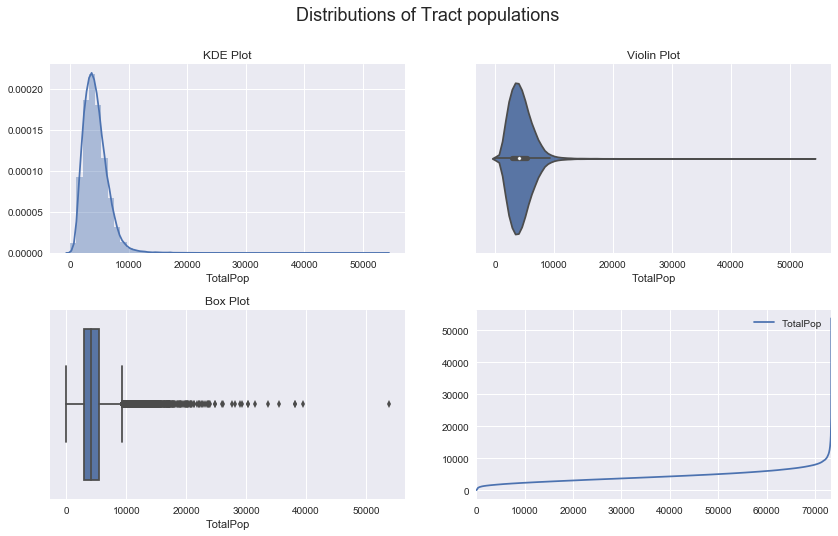

In [6]:
max_tract = tract.iloc[np.argmax(tract.TotalPop)][["CensusTract", "State", "County"]]
min_tract = tract.iloc[np.argmin(tract.TotalPop)][["CensusTract", "State", "County"]]

print("The most populated Tract is: {}{}, {}{}".format(color.BOLD, max_tract.County, max_tract.State, color.END),
      "with a population of: {}{}{} people".format(color.BOLD, max(tract.TotalPop), color.END))
print("The least populated Tract is: {}{}, {}{} ".format(color.BOLD, min_tract.County, min_tract.State, color.END),
      "with a population of: {}{}{} people".format(color.BOLD, min(tract.TotalPop), color.END))
print("The median number of people sampled in a Tract is: {}{}{}".format(color.BOLD, int(tract.TotalPop.median()), color.END))

### Plotting the different distributions
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Distributions of Tract populations", fontsize=18)

sns.distplot(tract.TotalPop, ax=axarr[0][0]).set(title="KDE Plot")
sns.violinplot(tract.TotalPop, ax=axarr[0][1]).set(title="Violin Plot")
sns.boxplot(tract.TotalPop, ax=axarr[1][0]).set(title="Box Plot")
_ = tract.TotalPop.sort_values().reset_index().drop("index", axis=1).plot(kind="line", ax=axarr[1][1])

<a name="counties"></a>
### [^](#toc) <u>Counties</u>

The most populated County is: Los Angeles, California with a population of: 10038388 people
The least populated County is: Kalawao, Hawaii with a population of: 85 people
The median number of people living in a County is: 26035


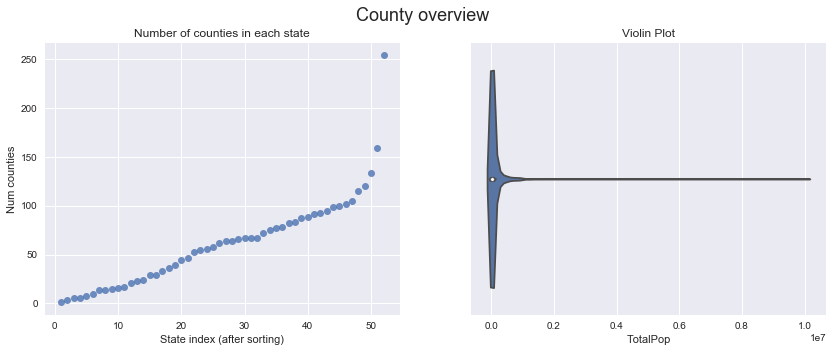

In [7]:
county_pop = county.groupby(["State", "County"]).TotalPop.sum()
print("The most populated County is: {}{}{}".format(color.BOLD, ", ".join(np.argmax(county_pop)[::-1]), color.END),
      "with a population of: {}{}{} people".format(color.BOLD, max(county_pop), color.END))
print("The least populated County is: {}{}{}".format(color.BOLD, ", ".join(np.argmin(county_pop)[::-1]), color.END),
      "with a population of: {}{}{} people".format(color.BOLD, min(county_pop), color.END))
print("The median number of people living in a County is: {}{}{}".format(color.BOLD, int(county_pop.median()), color.END))


### Plotting the different distributions
fig, axarr = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("County overview", fontsize=18)

counties = sorted(county.groupby("State").County.agg(len))
x = np.linspace(1, len(counties), len(counties))
counties = pd.DataFrame({"x":x, "Counties": counties})
(
    sns.regplot(x="x", y="Counties", data=counties, fit_reg=False, ax=axarr[0])
       .set(xlabel="State index (after sorting)", ylabel="Number of counties", title="Number of counties in each state")
)

_ = sns.violinplot(county.TotalPop, ax=axarr[1]).set(title="Violin Plot")

<a name="states"></a>
### [^](#toc) <u>States</u>

Okay, we all know what a State it, but let's see some visualizations anyways

The most populated State is: California with a population of: 38421464 people
The least populated State is: Wyoming with a population of: 579679 people
The median number of people living in a State is: 4168293


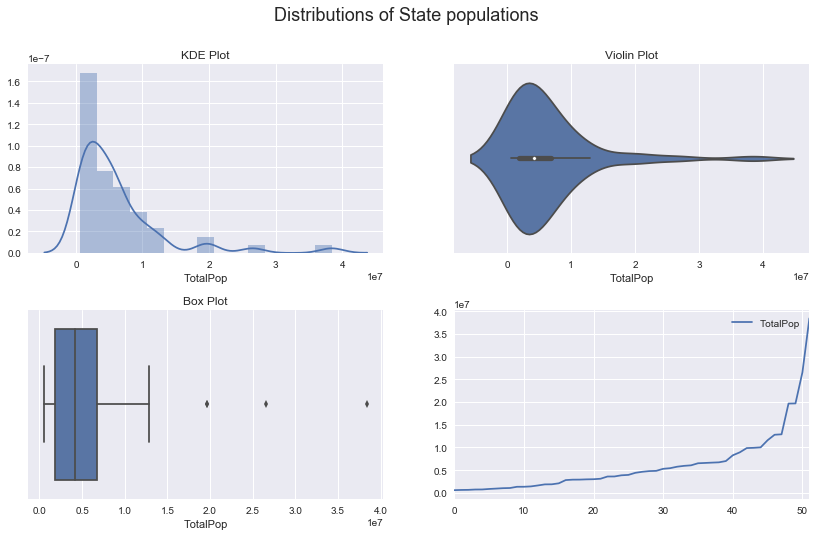

In [8]:
state_pop = county.groupby("State").TotalPop.sum()

print("The most populated State is: {}{}{}".format(color.BOLD, np.argmax(state_pop), color.END),
      "with a population of: {}{}{} people".format(color.BOLD, max(state_pop), color.END))
print("The least populated State is: {}{}{}".format(color.BOLD, np.argmin(state_pop), color.END),
      "with a population of: {}{}{} people".format(color.BOLD, min(state_pop), color.END))
print("The median number of people living in a State is: {}{}{}".format(color.BOLD, int(state_pop.median()), color.END))

### Plotting the different distributions
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Distributions of State populations", fontsize=18)

state_pop = county.groupby("State").TotalPop.sum()

sns.distplot(state_pop, ax=axarr[0][0]).set(title="KDE Plot")
sns.violinplot(state_pop, ax=axarr[0][1]).set(title="Violin Plot")
sns.boxplot(state_pop, ax=axarr[1][0]).set(title="Box Plot")
_ = state_pop.sort_values().reset_index().drop("State", axis=1).plot(kind="line", ax=axarr[1][1])

<a name="general"></a>
# [^](#toc) <u>General</u>

Before we really start looking at the data, we need to see first if any preprocessing needs to be done.  This can take form in multiple ways such as incorrect data, removing outliers (sometimes!), formating errors, adding or removing columns.

I'd say universally, you want to look at the data to see if it's missing any values and drop or fill in those rows as necessary.  Let's look at both our dataframes for missing values

In [9]:
print("Shape of county", county.shape)
print("Shape of tract", tract.shape)
print("Columns", county.columns)
county.head()

Shape of county (3220, 37)
Shape of tract (73311, 37)
Columns Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


<a name="nan_county"></a>
### [^](#toc) <u>Missing values - County</u>

There doesn't seem to be anything serverely wrong with these missing values.  Both rows are only considering around 100 people and are complete for the most part.  Let's move on without filling in or dropping any rows.

In [10]:
missing_cols = [col for col in county.columns if any(county[col].isnull())]

print(county[missing_cols].isnull().sum())

### Look at rows with missing values
county[county.isnull().any(axis=1)]

Income          1
IncomeErr       1
ChildPoverty    1
dtype: int64


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
548,15005,Hawaii,Kalawao,85,42,43,4.7,37.6,0.0,0.0,...,40.3,14.9,3.0,9.2,64,25.0,64.1,10.9,0.0,0.0
2673,48301,Texas,Loving,117,74,43,35.0,41.0,0.0,12.8,...,8.1,0.0,16.1,25.4,62,71.0,27.4,1.6,0.0,15.1


<a name="nan_tract"></a>
### [^](#toc) <u>Missing values - Tract</u>

The tract data appears to have a more severe case of missing data.  In addition there appears to be hundreds of rows without a population.  This is something worth fixing

In [11]:
missing_cols = [col for col in tract.columns if any(tract[col].isnull())]
print(tract[missing_cols].isnull().sum())

### Look at rows with missing values
tract[tract.isnull().any(axis=1)].head()

Income             410
IncomeErr          410
IncomePerCap        50
IncomePerCapErr     50
Poverty            145
ChildPoverty       428
Professional       117
Service            117
Office             117
Construction       117
Production         117
Drive              107
Carpool            107
Transit            107
Walk               107
OtherTransp        107
WorkAtHome         107
MeanCommute        259
PrivateWork        117
PublicWork         117
SelfEmployed       117
FamilyWork         117
Unemployment       112
dtype: int64


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
106,1015981901,Alabama,Calhoun,4,4,0,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
597,1081040700,Alabama,Lee,4793,2053,2740,3.1,85.4,6.8,0.2,...,21.2,2.6,4.7,12.6,843,74.7,23.4,1.9,0.0,14.2
598,1081040800,Alabama,Lee,3310,1801,1509,1.6,76.6,9.5,1.2,...,27.6,4.9,0.0,11.4,1141,57.4,40.7,1.9,0.0,11.8
805,1097003605,Alabama,Mobile,634,262,372,6.8,62.3,25.2,0.0,...,5.9,2.7,38.3,18.0,190,72.6,18.9,8.4,0.0,16.7
1298,2170000101,Alaska,Matanuska-Susitna Borough,744,384,360,1.9,89.9,2.0,3.6,...,18.6,10.7,39.1,22.6,215,51.6,13.0,35.3,0.0,26.1


### A deeper look at missing values

It appears most of the small tract samples have missing values.  This is definitely not conclusive, but it does offer a suggestion.  Perhaps [this video](https://www.youtube.com/watch?v=bYwdOxOBwgM) could explain why some small tracts have missing values as well

Should more measures be taken with this data?  I'd argue no, the county dataset contains almost exactly the same information.  I'll use the county dataset mostly and look at the tract dataset as needed

In [12]:
tract.sort_values("TotalPop").head(20)

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
55761,42003980600,Pennsylvania,Allegheny,3,0,3,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
73348,72037160100,Puerto Rico,Ceiba,3,3,0,66.7,33.3,0.0,0.0,...,0.0,0.0,50.0,NaN,1,100.0,0.0,0.0,0.0,0.0
58137,42101980900,Pennsylvania,Philadelphia,4,4,0,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
106,1015981901,Alabama,Calhoun,4,4,0,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
55760,42003980500,Pennsylvania,Allegheny,4,4,0,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
46492,36081021900,New York,Queens,4,0,4,0.0,100.0,0.0,0.0,...,100.0,0.0,0.0,NaN,4,100.0,0.0,0.0,0.0,0.0
33953,26099982000,Michigan,Macomb,4,0,4,0.0,100.0,0.0,0.0,...,0.0,0.0,0.0,NaN,4,100.0,0.0,0.0,0.0,0.0
27156,20209043804,Kansas,Wyandotte,4,4,0,100.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
59219,45041980100,South Carolina,Florence,4,0,4,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
45725,36061014300,New York,New York,5,0,5,40.0,0.0,40.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,100.0


<a name="whole_nation"></a>
### [^](#toc) <u>Nation as a Whole</u>

I include both Tract and County data for the dual purpose of validating that they are equal

In [13]:
pd.DataFrame({
    "Population": [tract.TotalPop.sum(), county.TotalPop.sum()],
    "Women": [tract.Women.sum(), county.Women.sum()],
    "Men": [tract.Men.sum(), county.Men.sum()],
    "Citizens": [tract.Citizen.sum(), county.Citizen.sum()],
    "States": [len(tract.State.unique()), len(county.State.unique())],
    "Counties": [len(tract.groupby(["State", "County"])), len(county.groupby(["State", "County"]))],
    "Employed": [tract.Employed.sum(), county.Employed.sum()],
}, index=["Tract data", "County data"])

,Citizens,Counties,Employed,Men,Population,States,Women
Tract data,225190931,3220,146811129,157448140,320098094,52,162649954
County data,225190931,3220,146811129,157448140,320098094,52,162649954


<a name="gen_corr"></a>
### [^](#toc) <u>Correlation Maps</u>

Since there are so many columns, I split the map into three.

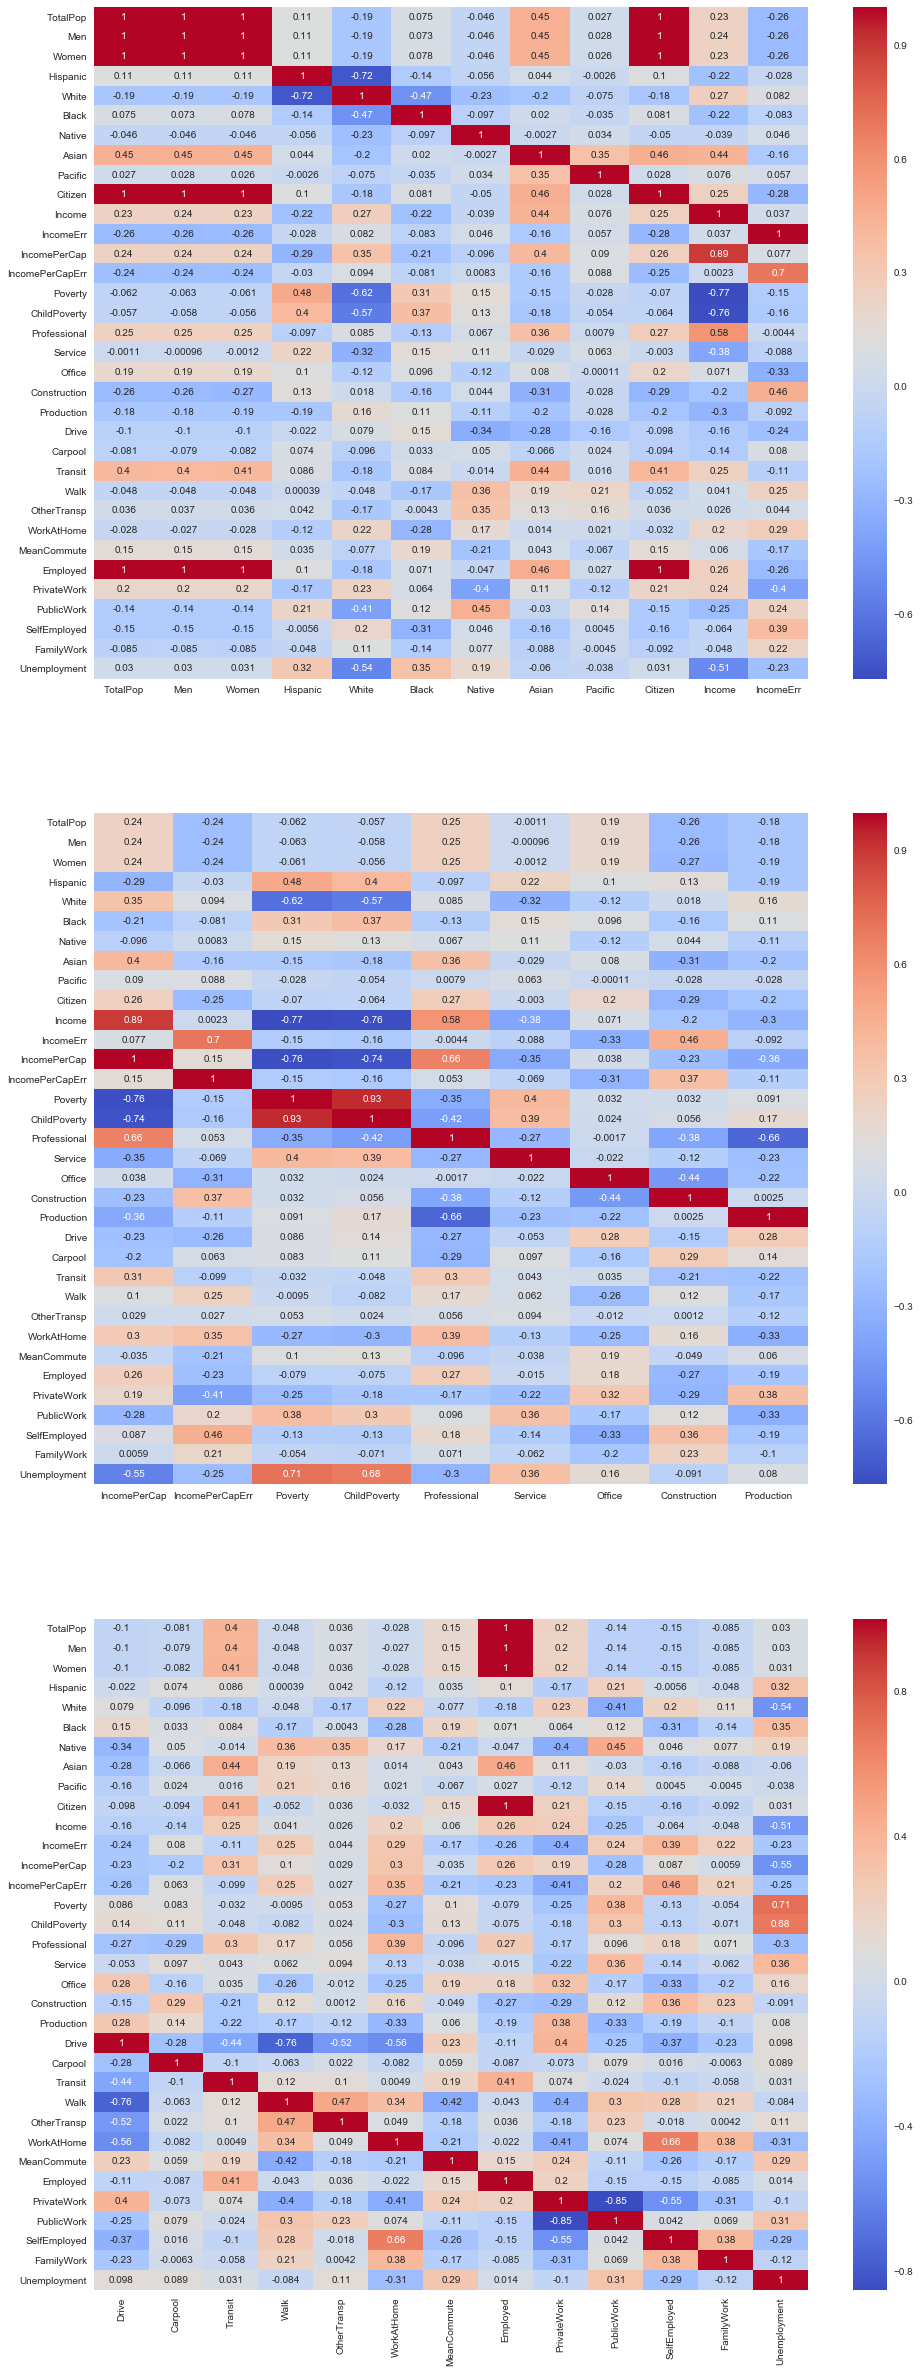

In [14]:
fig, axarr = plt.subplots(3, 1, figsize=(16, 42))
data = county.drop("CensusId", axis=1).corr()

sns.heatmap(data.head(12).transpose(), annot=True, cmap="coolwarm", ax=axarr[0])
sns.heatmap(data.iloc[12:21].transpose(), annot=True, cmap="coolwarm", ax=axarr[1])
_ = sns.heatmap(data.tail(13).transpose(), annot=True, cmap="coolwarm", ax=axarr[2])

<a name="state"></a>
# [^](#toc) <u>State</u>

### Can two states have the same county name?

The answer is a resounding yes

In [15]:
dup_counties = county.groupby("County").apply(len).sort_values(ascending=False)
dup_counties.where(dup_counties > 1).dropna()

County
Washington    31.0
Jefferson     26.0
Franklin      25.0
Jackson       24.0
Lincoln       24.0
Madison       20.0
Clay          18.0
Union         18.0
Montgomery    18.0
Marion        17.0
Monroe        17.0
Wayne         16.0
Grant         15.0
Warren        14.0
Greene        14.0
Carroll       13.0
Polk          12.0
Johnson       12.0
Lake          12.0
Douglas       12.0
Lee           12.0
Adams         12.0
Clark         12.0
Marshall      12.0
Morgan        11.0
Crawford      11.0
Scott         11.0
Fayette       11.0
Lawrence      11.0
Calhoun       11.0
              ... 
Sumner         2.0
Harlan         2.0
Steele         2.0
Bradford       2.0
Surry          2.0
Barton         2.0
Barry          2.0
Boyd           2.0
Beaufort       2.0
Leon           2.0
Stanton        2.0
Brooks         2.0
Gloucester     2.0
Bath           2.0
Hale           2.0
Hampshire      2.0
Tipton         2.0
Trinity        2.0
Halifax        2.0
Bibb           2.0
Baldwin        2.0
Gilme

<a name="st_pop"></a>
### [^](#toc) <u>Population</u>

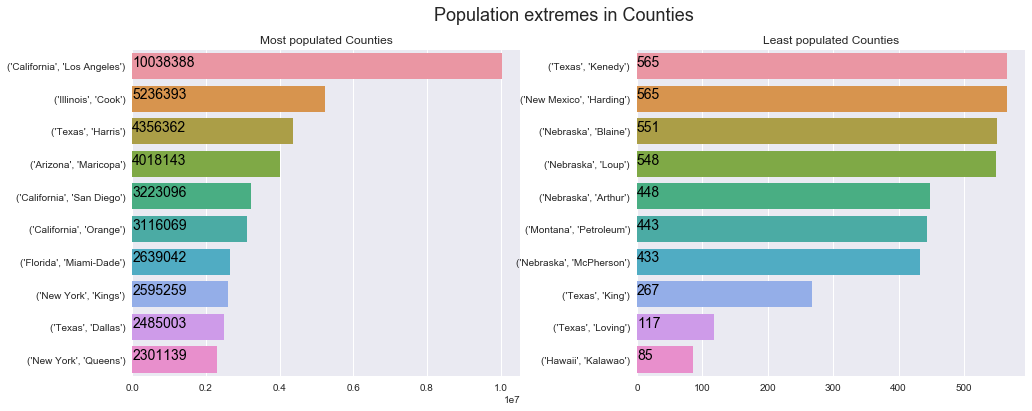

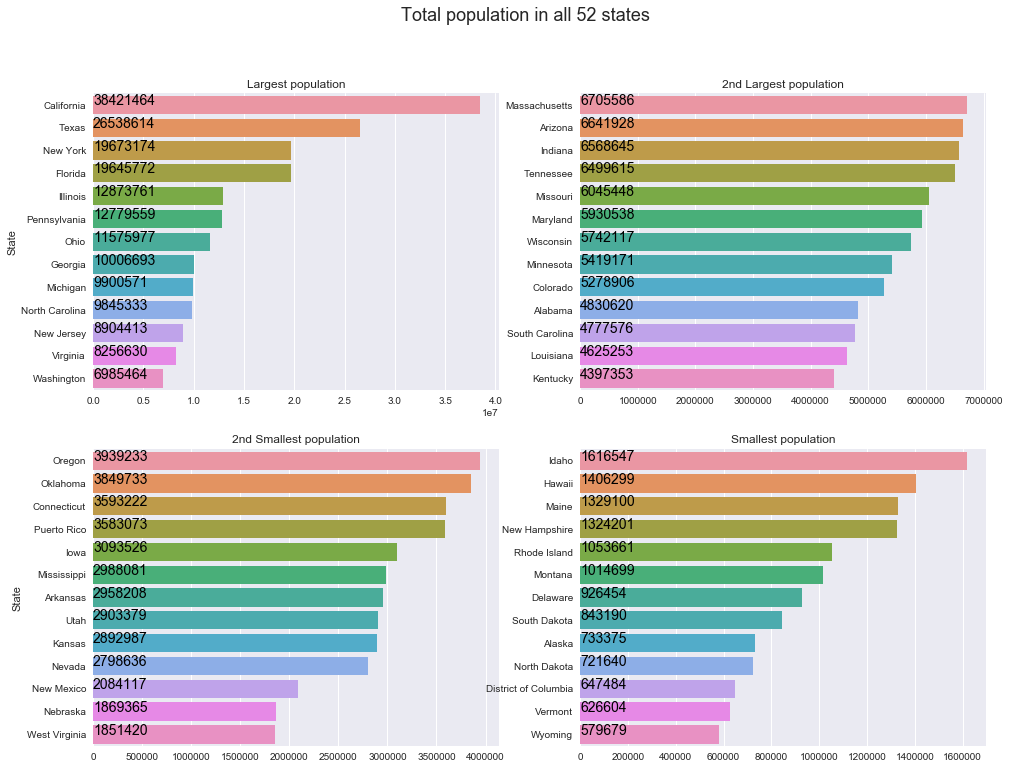

In [35]:
##### County Plots

fig, axarr = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(wspace=0.3)
fig.suptitle("Population extremes in Counties", fontsize=18)

county_pop = county.groupby(["State", "County"]).TotalPop.median().sort_values(ascending=False)

pretty_bar(county_pop.head(10), axarr[0], title="Most populated Counties")
pretty_bar(county_pop.tail(10), axarr[1], title="Least populated Counties")
plt.show()

##### State Plots

fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Total population in all 52 states", fontsize=18)

state_pops = county.groupby("State")["TotalPop"].sum().sort_values(ascending=False)

pretty_bar(state_pops.head(13), axarr[0][0], title="Largest population")
pretty_bar(state_pops.iloc[13:26], axarr[0][1], title="2nd Largest population", ylabel="")
pretty_bar(state_pops.iloc[26:39], axarr[1][0], title="2nd Smallest population")
pretty_bar(state_pops.tail(13), axarr[1][1], title="Smallest population", ylabel="")

<a name="st_trans"></a>
### [^](#toc) <u>Transportation</u>

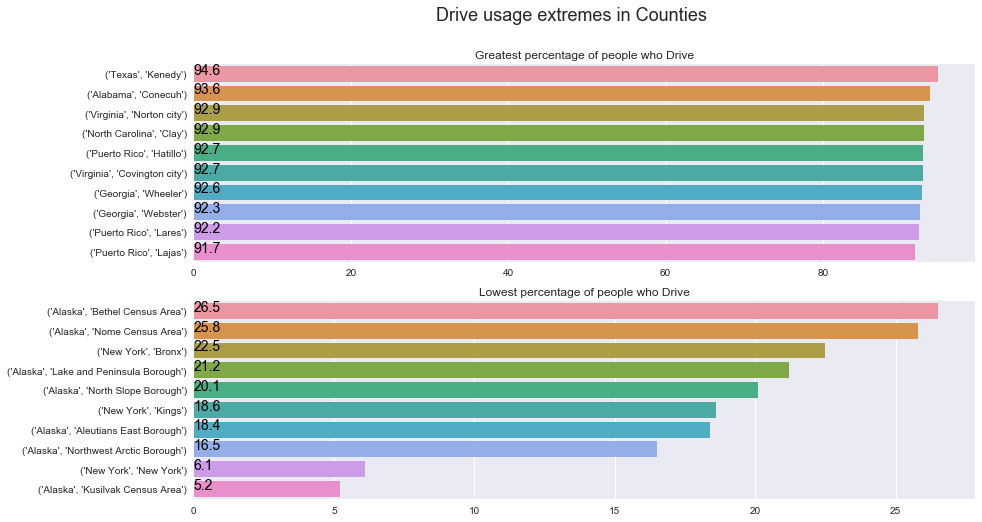

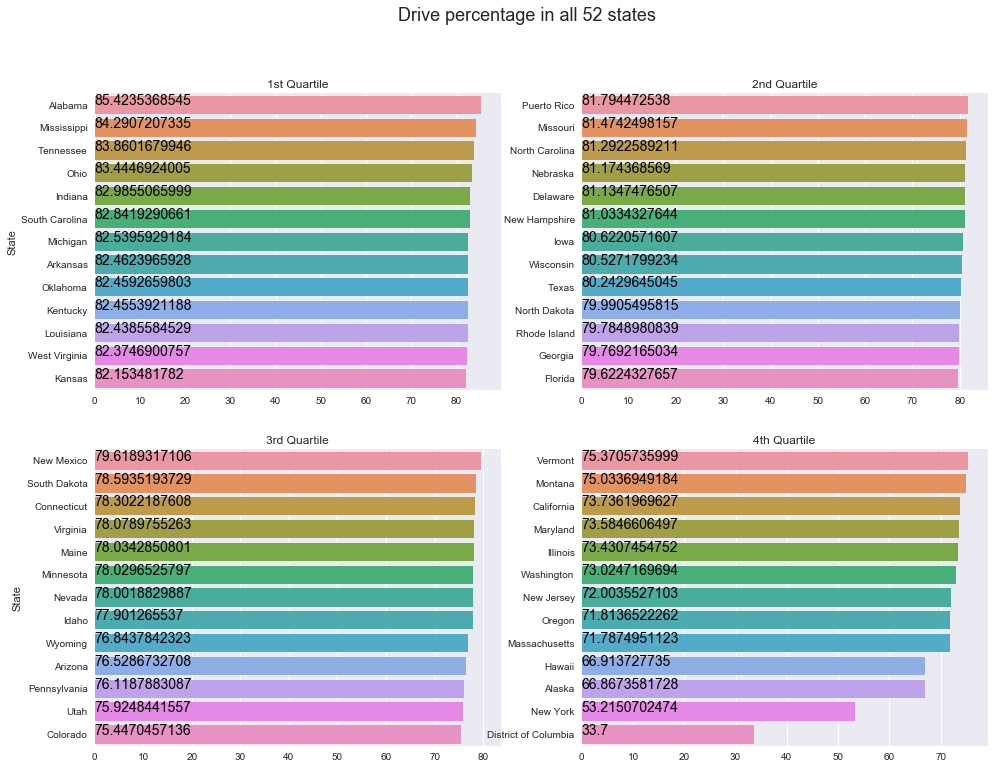

In [54]:
transportations = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']
transportation = transportations[0]

##### County Plots

fig, axarr = plt.subplots(2, 1, figsize=(14, 8))
fig.subplots_adjust(wspace=0.5)
fig.suptitle("{} usage extremes in Counties".format(transportation), fontsize=18)

trans_pops = county.groupby(["State", "County"])[transportation].median().sort_values(ascending=False)

pretty_bar(trans_pops.head(10), axarr[0], title="Greatest percentage of people who {}".format(transportation))
pretty_bar(trans_pops.tail(10), axarr[1], title="Lowest percentage of people who {}".format(transportation))
plt.show()

##### State Plots

county["trans"] = county.TotalPop * county[transportation]
plot_data = county.groupby("State")["trans"].sum() / county.groupby("State")["TotalPop"].sum()
plot_data = plot_data.sort_values(ascending=False)

fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("{} percentage in all 52 states".format(transportation), fontsize=18)

trans_pops = county.groupby(["State"])["trans_method"].sum().sort_values(ascending=False)

pretty_bar(plot_data.head(13), axarr[0][0], title="1st Quartile")
pretty_bar(plot_data.iloc[13:26], axarr[0][1], title="2nd Quartile", ylabel="")
pretty_bar(plot_data.iloc[26:39], axarr[1][0], title="3rd Quartile")
pretty_bar(plot_data.tail(13), axarr[1][1], title="4th Quartile", ylabel="")

# Remove created column
county = county.drop("trans", axis=1)

<a name="st_unemploy"></a>
### [^](#toc) <u>Unemployment</u>

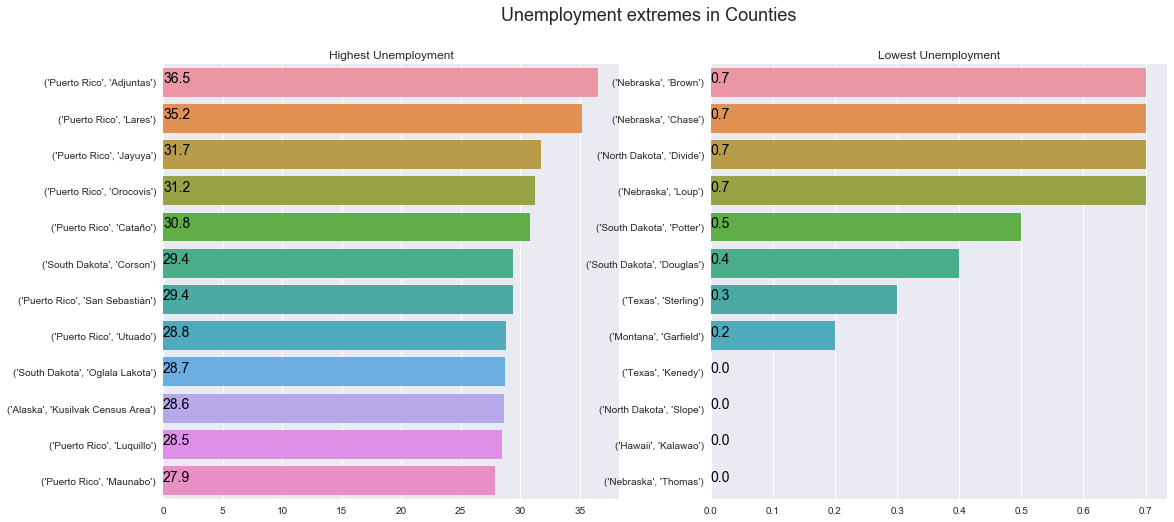

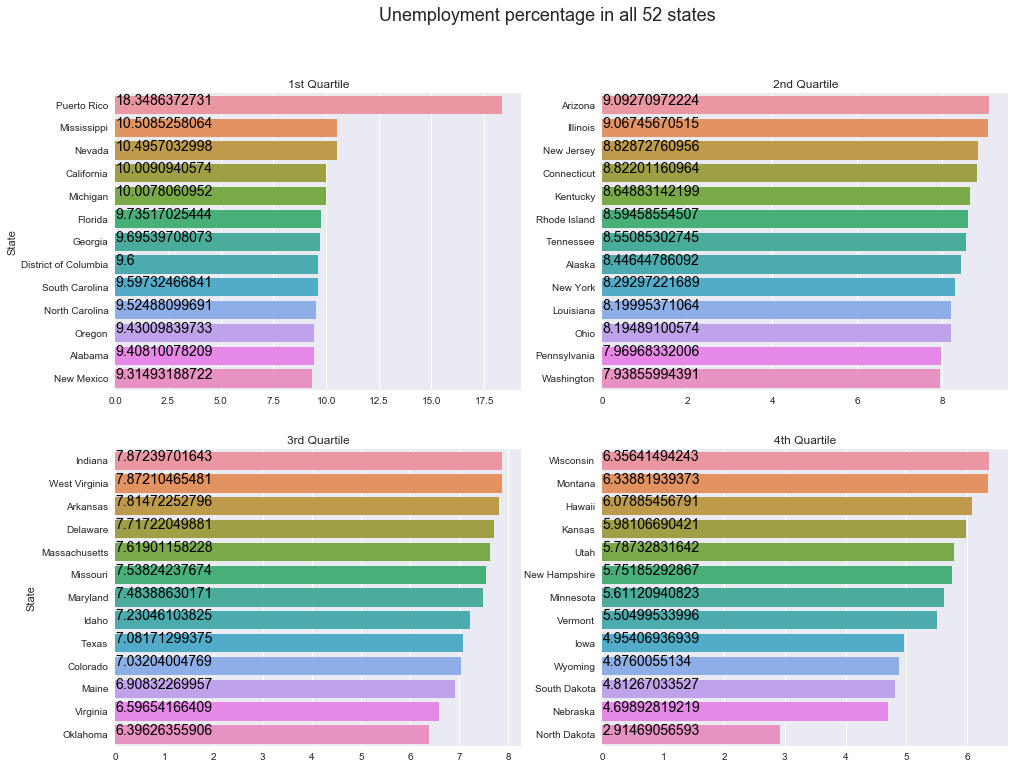

In [56]:
##### County Plots

fig, axarr = plt.subplots(1, 2, figsize=(18,8))
fig.subplots_adjust(hspace=0.8)
fig.suptitle("Unemployment extremes in Counties", fontsize=18)

unemployment = county.groupby(["State", "County"])["Unemployment"].median().sort_values(ascending=False)

pretty_bar(unemployment.head(12), axarr[0], title="Highest Unemployment")
pretty_bar(unemployment.tail(12), axarr[1], title="Lowest Unemployment")
plt.show()

##### State Plots

fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Unemployment percentage in all 52 states", fontsize=18)

county["Tot_Unemployment"] = county.Unemployment * county.TotalPop
unemployment = county.groupby("State").Tot_Unemployment.sum() / county.groupby("State").TotalPop.sum()
unemployment = unemployment.sort_values(ascending=False)

pretty_bar(unemployment.head(13), axarr[0][0], title="1st Quartile")
pretty_bar(unemployment.iloc[13:26], axarr[0][1], title="2nd Quartile", ylabel="")
pretty_bar(unemployment.iloc[26:39], axarr[1][0], title="3rd Quartile")
pretty_bar(unemployment.tail(13), axarr[1][1], title="4th Quartile", ylabel="")

# Remove created column
county = county.drop("Tot_Unemployment", axis=1)

### Income in Counties

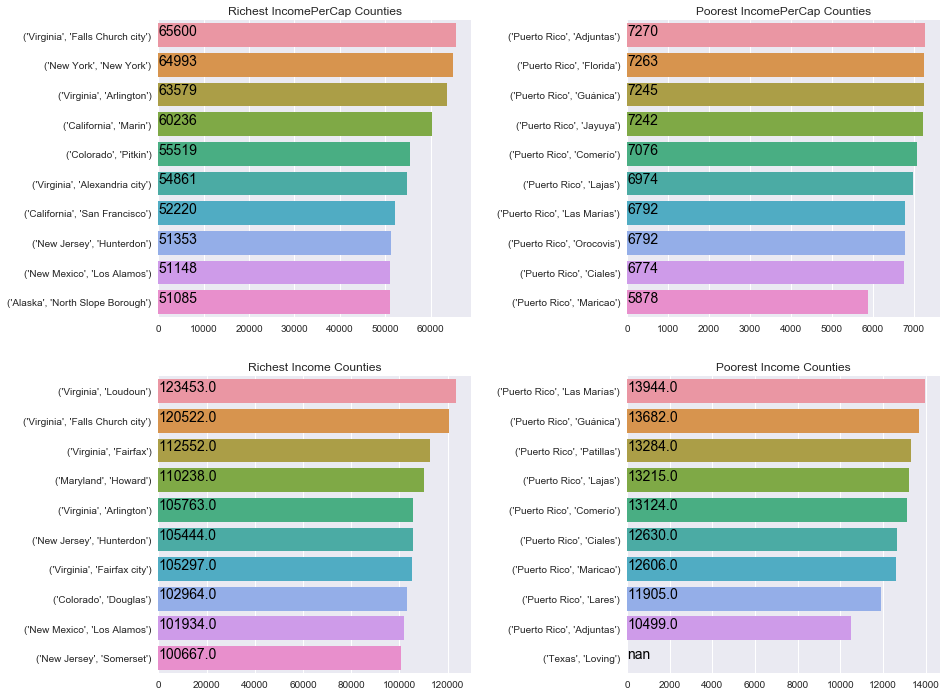

In [57]:
fig, axarr = plt.subplots(2, 2, figsize=(14,12))
fig.subplots_adjust(wspace=0.5)

county_income_per_cap = county.groupby(["State", "County"])["IncomePerCap"].median().sort_values(ascending=False)
county_income = county.groupby(["State", "County"])["Income"].median().sort_values(ascending=False)

pretty_bar(county_income_per_cap.head(10), axarr[0][0], title="Richest IncomePerCap Counties")
pretty_bar(county_income_per_cap.tail(10), axarr[0][1], title="Poorest IncomePerCap Counties", ylabel="")

pretty_bar(county_income.head(10), axarr[1][0], title="Richest Income Counties")
pretty_bar(county_income.tail(10), axarr[1][1], title="Poorest Income Counties", ylabel="")

### Poverty by County

I think there are some issues I have before I look at the poverty per state.

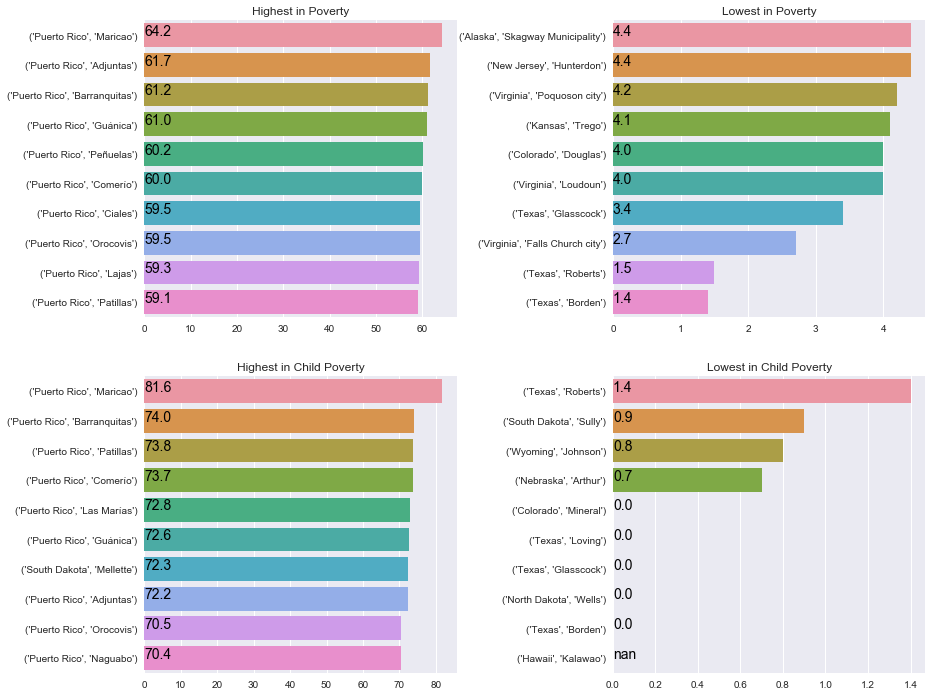

In [58]:
fig, axarr = plt.subplots(2, 2, figsize=(14,12))
fig.subplots_adjust(wspace=0.5)

poverty = county.groupby(["State", "County"])["Poverty"].median().sort_values(ascending=False)
child_poverty = county.groupby(["State", "County"])["ChildPoverty"].median().sort_values(ascending=False)

pretty_bar(poverty.head(10), axarr[0][0], title="Highest in Poverty")
pretty_bar(poverty.tail(10), axarr[0][1], title="Lowest in Poverty", ylabel="")

pretty_bar(child_poverty.head(10), axarr[1][0], title="Highest in Child Poverty")
pretty_bar(child_poverty.tail(10), axarr[1][1], title="Lowest in Child Poverty", ylabel="")

### Commute time

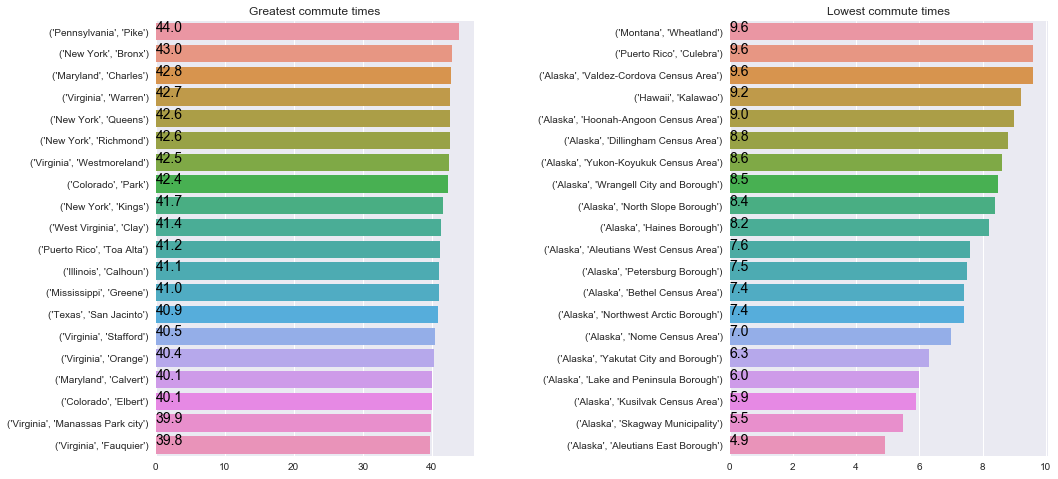

In [59]:
fig, axarr = plt.subplots(1, 2, figsize=(16, 8))
fig.subplots_adjust(wspace=0.8)

commute = county.groupby(["State", "County"])["MeanCommute"].median().sort_values(ascending=False)

pretty_bar(commute.head(20), axarr[0], title="Greatest commute times")
pretty_bar(commute.tail(20), axarr[1], title="Lowest commute times")

### Work type by County

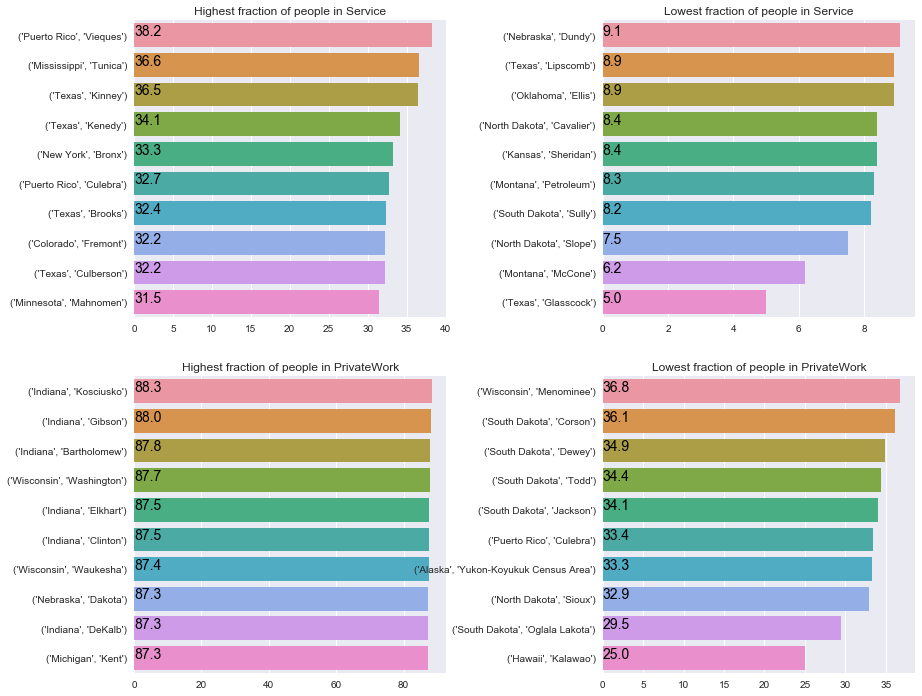

In [62]:
careers = ['Professional', 'Service', 'Office', 'Construction', 'Production']
sectors = ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']

career = careers[1]
sector = sectors[0]

fig, axarr = plt.subplots(2, 2, figsize=(14,12))
fig.subplots_adjust(wspace=0.5)

car = county.groupby(["State", "County"])[career].median().sort_values(ascending=False)
sec = county.groupby(["State", "County"])[sector].median().sort_values(ascending=False)

pretty_bar(car.head(10), axarr[0][0], title="Highest fraction of people in {}".format(career))
pretty_bar(car.tail(10), axarr[0][1], title="Lowest fraction of people in {}".format(career), ylabel="")

pretty_bar(sec.head(10), axarr[1][0], title="Highest fraction of people in {}".format(sector))
pretty_bar(sec.tail(10), axarr[1][1], title="Lowest fraction of people in {}".format(sector), ylabel="")

---

<a name="race"></a>
# [^](#toc) <u>Racial Focus</u>

### Create new column: total population for each race

In [63]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for race in races:
    county[race + "_pop"] = (county[race] * county.TotalPop) / 100

<a name="race_pop"></a>
### [^](#toc) <u>Population and Representation</u>

I've never heard of Cook Illinois, but it has the highest Black Population and the 4th highest Hispanic Population.

Also LA seems to top the charts in terms of diversity

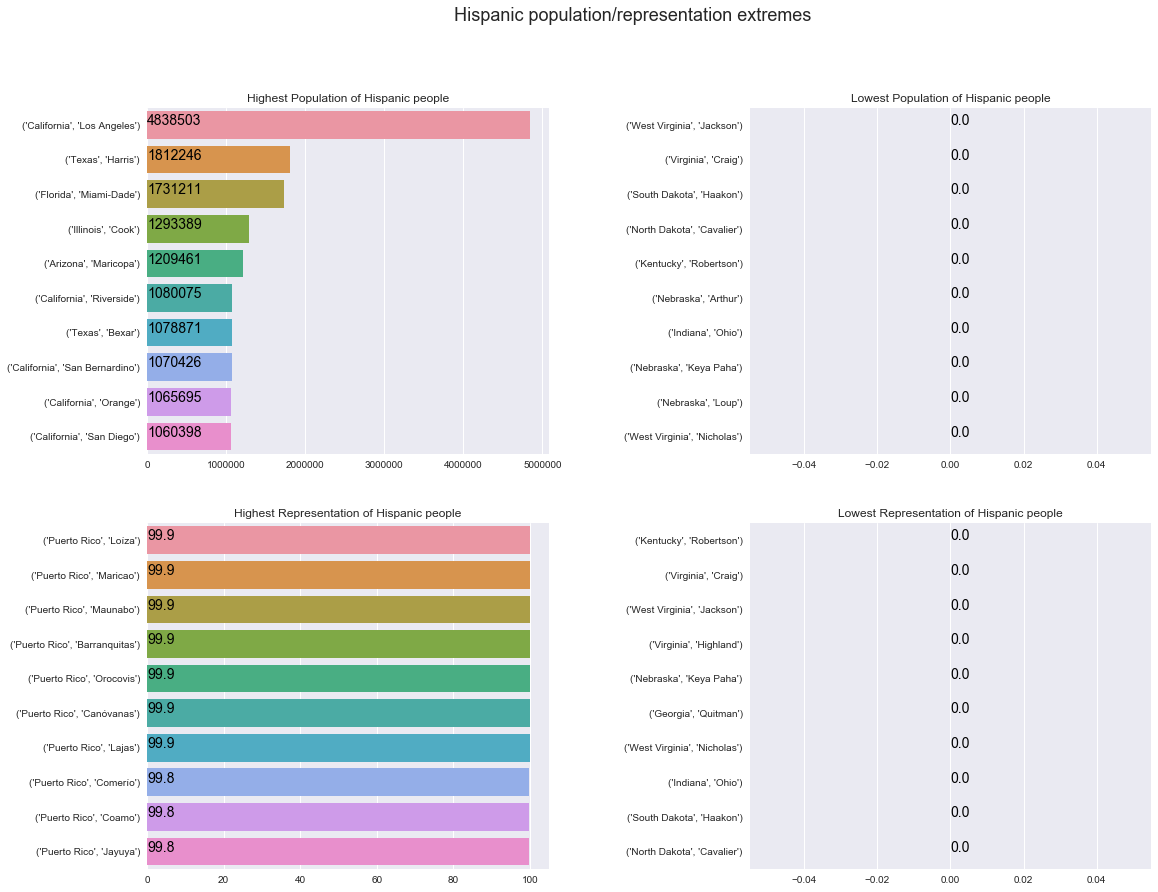

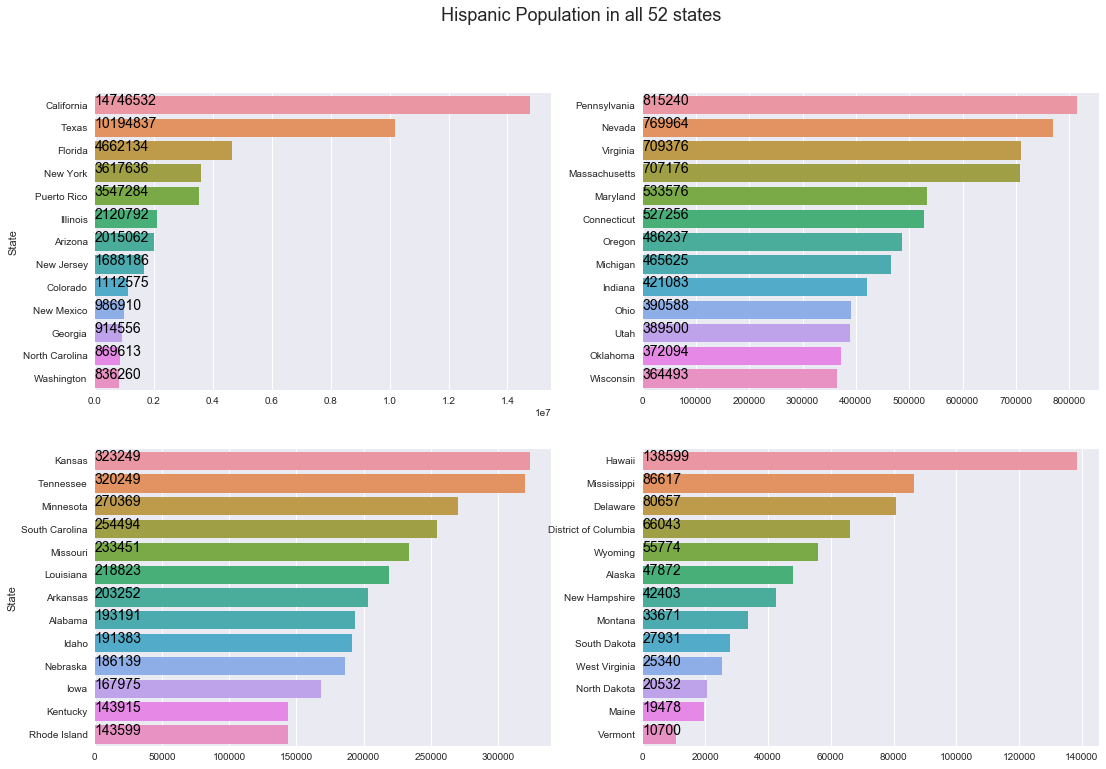

In [65]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
race = races[0]

##### County Plots

fig, axarr = plt.subplots(2, 2, figsize=(18,14))
fig.subplots_adjust(wspace=0.5)
fig.suptitle("{} population/representation extremes".format(race), fontsize=18)

race_pops = county.groupby(["State", "County"])[race + "_pop"].sum().sort_values(ascending=False)
race_reps = county.groupby(["State", "County"])[race].median().sort_values(ascending=False)

pretty_bar(race_pops.head(10), axarr[0][0], int_text=True, title="Highest Population of {} people".format(race))
pretty_bar(race_pops.tail(10), axarr[0][1], title="Lowest Population of {} people".format(race))
pretty_bar(race_reps.head(10), axarr[1][0], title="Highest Representation of {} people".format(race))
pretty_bar(race_reps.tail(10), axarr[1][1], title="Lowest Representation of {} people".format(race))
plt.show()

##### State Plots

fig, axarr = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("{} Population in all 52 states".format(race), fontsize=18)

race_pops = county.groupby("State")[race + "_pop"].sum().sort_values(ascending=False)

pretty_bar(race_pops.head(13), ax=axarr[0][0], int_text=True)
pretty_bar(race_pops.iloc[13:26], ax=axarr[0][1], int_text=True, ylabel="")
pretty_bar(race_pops.iloc[26:39], ax=axarr[1][0], int_text=True)
pretty_bar(race_pops.tail(13), ax=axarr[1][1], int_text=True, ylabel="")

<a name="race_unemploy"></a>
### [^](#toc) <u>Unemployment</u>

There are clearly flaws with this (a really high native pop, but everyone unemployed is pacific), but maybe there will be interesting results.

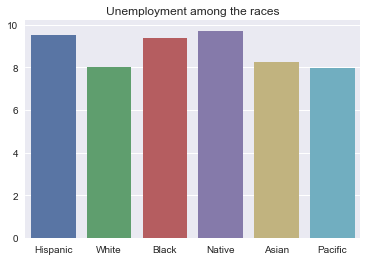

In [67]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
unemployment = list()

for race in races:
    total_unemployed = (county.TotalPop * county.Unemployment * county[race] / 100).sum()
    total_population = county[race + "_pop"].sum()
    frac_unemployed = total_unemployed / total_population
    unemployment.append(frac_unemployed)
    
_ = sns.barplot(races, unemployment).set(title="Unemployment among the races")

### Remove created variable: Total population for each race

In [69]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
county = county.drop([race + "_pop" for race in races], axis=1)

ValueError: labels ['Hispanic_pop' 'White_pop' 'Black_pop' 'Native_pop' 'Asian_pop'
 'Pacific_pop'] not contained in axis

<a name="race_corr"></a>
### [^](#toc) <u>Correlation Map</u>

Emphasis on the word correlation, not causation

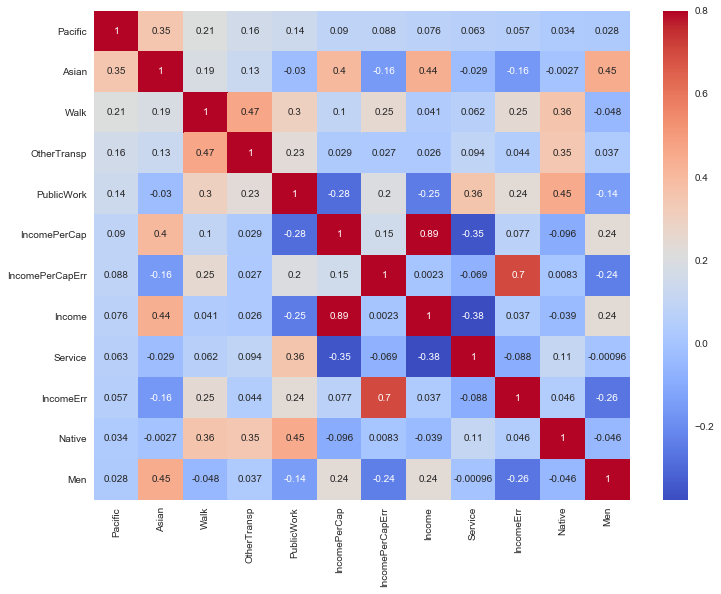

In [70]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
race = races[5]

cols = county.drop("CensusId", axis=1).corr().nlargest(12, race).tail(12).index

f, ax = plt.subplots(figsize=(12, 9))
_ = sns.heatmap(county[cols].corr(), vmax=.8, cmap = "coolwarm", annot=True)

---

<a name="numeric"></a>
# [^](#toc) Numeric Focus


### Quick look

Just by looking at 6 columns we can see a few things:

- Growing unemployment leads to poverty
- Poverty decreases with higher income
- Poverty encourages people to carpool
- Commuties that take Transit have longer commutes

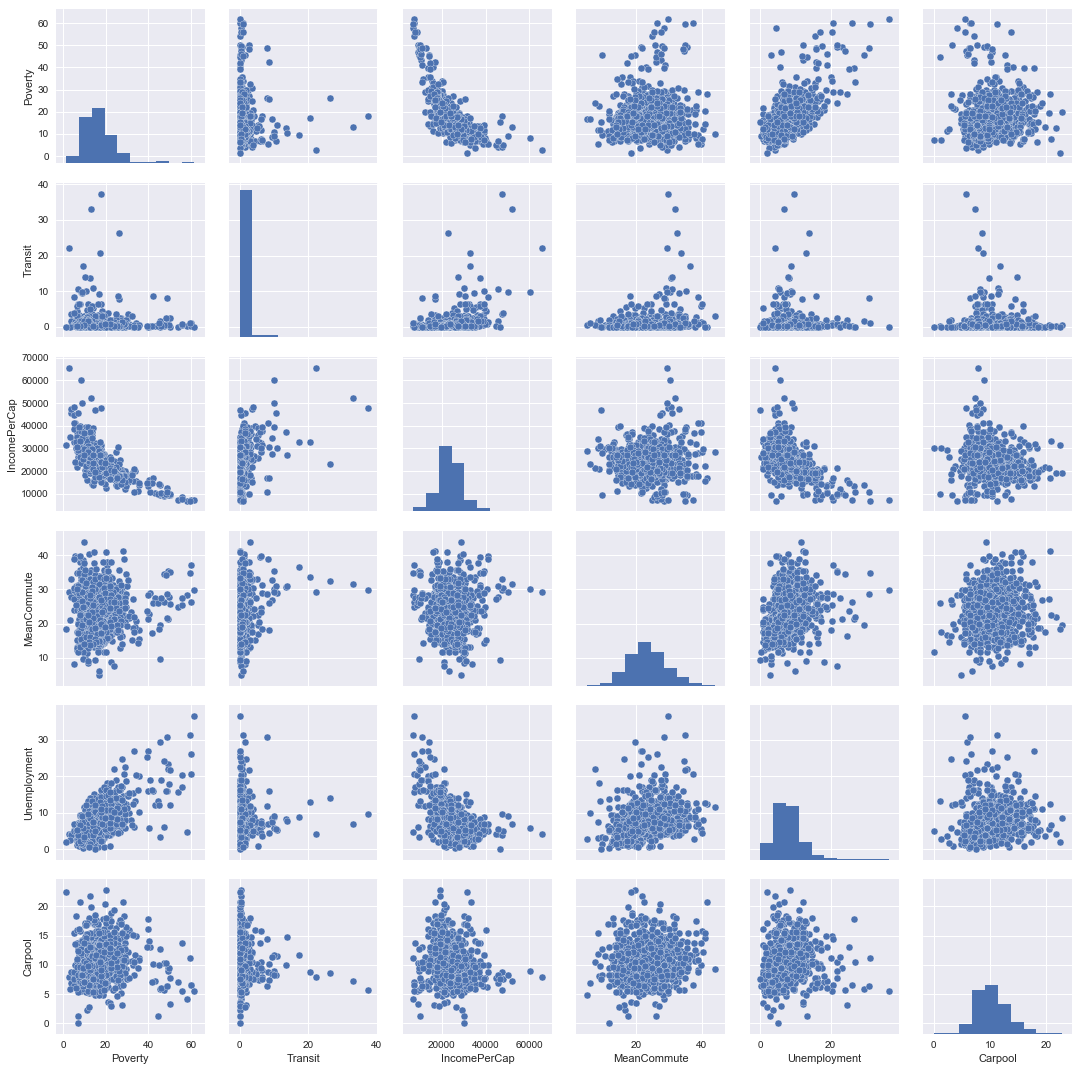

In [71]:
numeric_cols = ['Poverty', 'Transit', 'IncomePerCap', 'MeanCommute', 'Unemployment', "Carpool"]

_ = sns.pairplot(county[numeric_cols].sample(1000))

### Unemployment v. Poverty

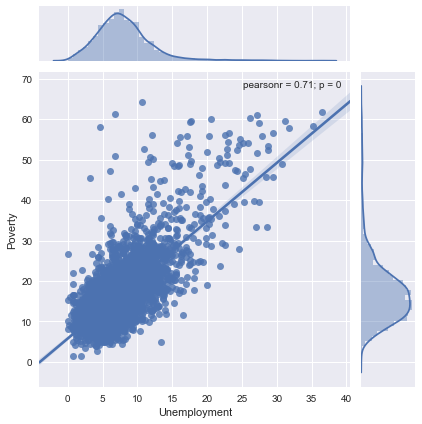

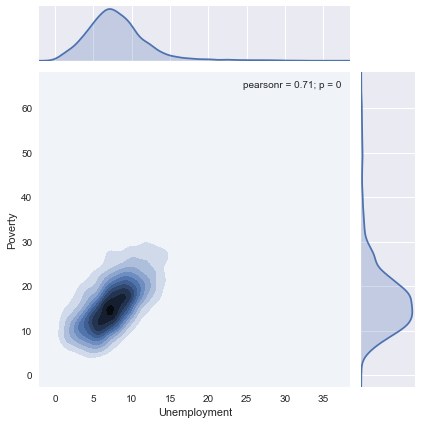

In [72]:
sns.jointplot(x='Unemployment', y='Poverty', data=county, kind="reg")
_ = sns.jointplot(x='Unemployment', y='Poverty', data=county, kind='kde')

### Poverty v. Income

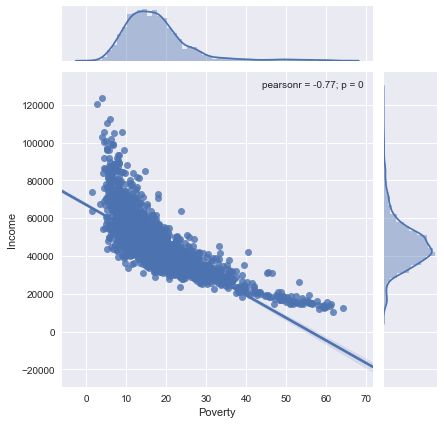

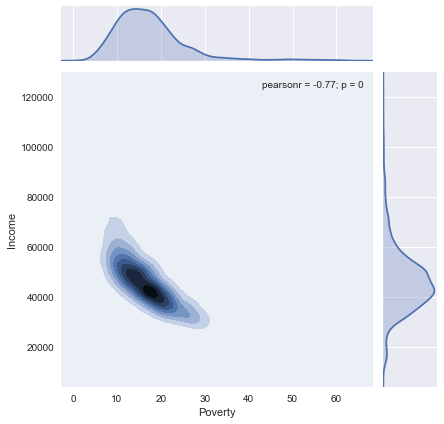

In [73]:
sns.jointplot(x='Poverty', y='Income', data=county, kind="reg")
_ = sns.jointplot(x='Poverty', y='Income', data=county, kind="kde")

### Poverty v. Carpool

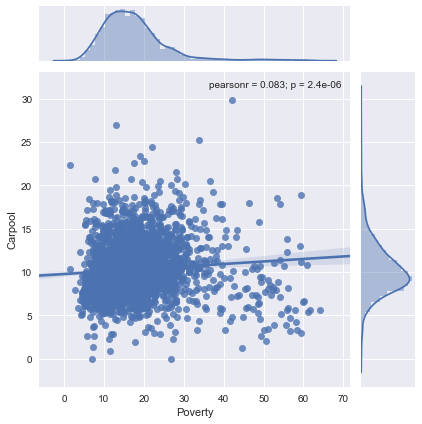

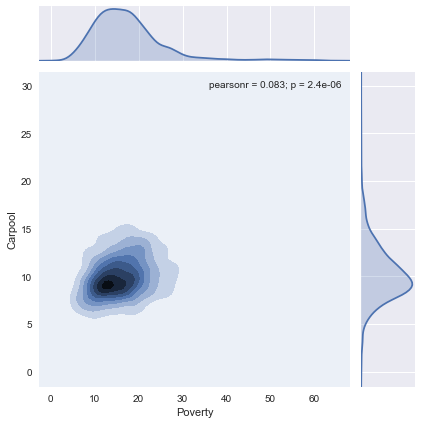

In [74]:
sns.jointplot(x='Poverty', y='Carpool', data=county, kind="reg")
_ = sns.jointplot(x='Poverty', y='Carpool', data=county, kind="kde")

### MeanCommute v. Transit

This plot is really helpful, from the pairplot I suspected a bigger relationship than what I see here

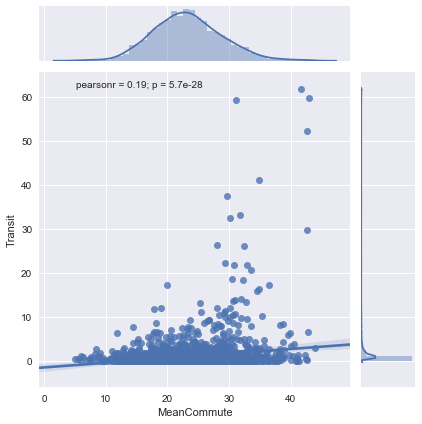

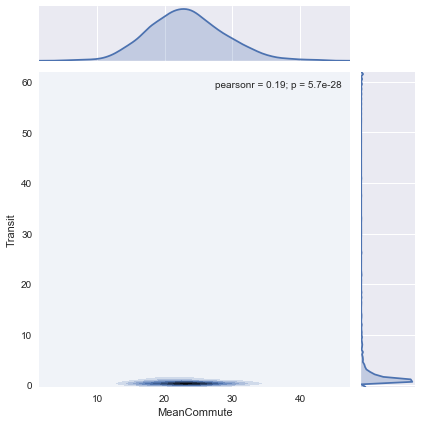

In [75]:
sns.jointplot(x='MeanCommute', y='Transit', data=county, kind="reg")
_ = sns.jointplot(x='MeanCommute', y='Transit', data=county, kind="kde")

<a name="nu_income"></a>
### [^](#toc) <u>Income</u>

#### Setup

In [78]:
high = county[county.Income > 80000]
mid  = county[(county.Income < 80000) & (county.Income > 32000)]
low  = county[county.Income < 32000]

print("Number of low income counties: {}{}{}".format(color.BOLD, len(low), color.END),
      "  Number of middle income counties: {}{}{}".format(color.BOLD, len(mid), color.END),
      "  Number of high income counties: {}{}{}".format(color.BOLD, len(high), color.END))

Number of low income counties: 287   Number of middle income counties: 2864   Number of high income counties: 68


#### Plots

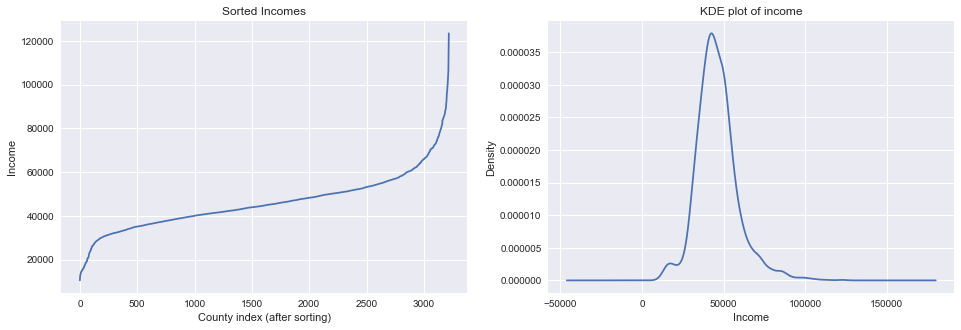

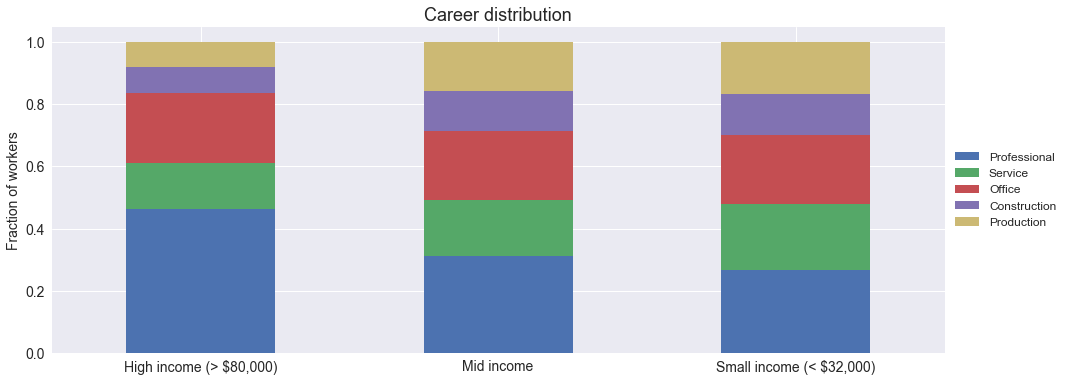

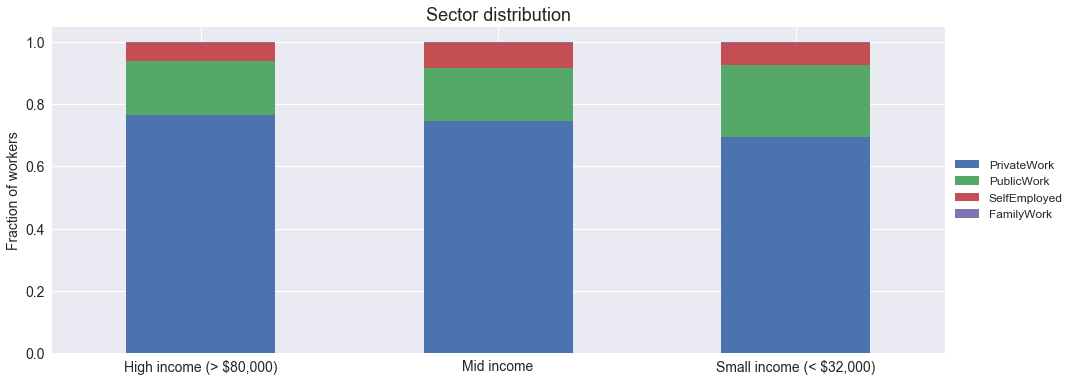

In [80]:
#########################   Income Distribution Plots   #########################

fig, axarr = plt.subplots(1, 2, figsize=(16, 5))

income = county.groupby(["State", "County"])["Income"].median().sort_values().values
axarr[0].plot(income)
axarr[0].set(title="Sorted Incomes", xlabel="County index (after sorting)", ylabel="Income")

(
        county
            .groupby(["State", "County"])["Income"]
            .median()
            .sort_values()
            .plot(kind="kde", ax=axarr[1])
            .set(title="KDE plot of income", xlabel="Income")
)
plt.show()

#########################   Career Type Plots   #########################

works = [ 'Professional', 'Service', 'Office', 'Construction','Production']

pd.DataFrame({
    "Small income (< $32,000)":  low[works].sum(axis=0) / low[works].sum(axis=0).sum(),
    "Mid income":  mid[works].sum(axis=0) / mid[works].sum(axis=0).sum(),
    "High income (> $80,000)": high[works].sum(axis=0) / high[works].sum(axis=0).sum()
}).transpose().plot(kind="bar", rot=0, stacked=True, fontsize=14, figsize=(16, 6))

plt.ylabel("Fraction of workers", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.title("Career distribution", fontsize=18)
plt.show()

#########################   Career Sector Plots   #########################

works = ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']

pd.DataFrame({
    "Small income (< $32,000)":  low[works].sum(axis=0) / low[works].sum(axis=0).sum(),
    "Mid income":  mid[works].sum(axis=0) / mid[works].sum(axis=0).sum(),
    "High income (> $80,000)": high[works].sum(axis=0) / high[works].sum(axis=0).sum()
}).transpose().plot(kind="bar", rot=0, stacked=True, fontsize=14, figsize=(16, 6))

plt.ylabel("Fraction of workers", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
_ = plt.title("Sector distribution", fontsize=18)

<a name="nu_comute"></a>
### [^](#toc) <u>Commute times</u>

#### Setup

In [ ]:
high_times = county[county.MeanCommute > 32]
mid_times = county[(county.MeanCommute < 32) & (county.MeanCommute > 15)]
low_times  = county[county.MeanCommute < 15]
print("Number of short commutes: {}{}{}".format(color.BOLD, len(low_times), color.END),
      "  Number of average commutes: {}{}{}".format(color.BOLD, len(mid_times), color.END),
      "  Number of long commutes: {}{}{}".format(color.BOLD, len(high_times), color.END))

#### Plots

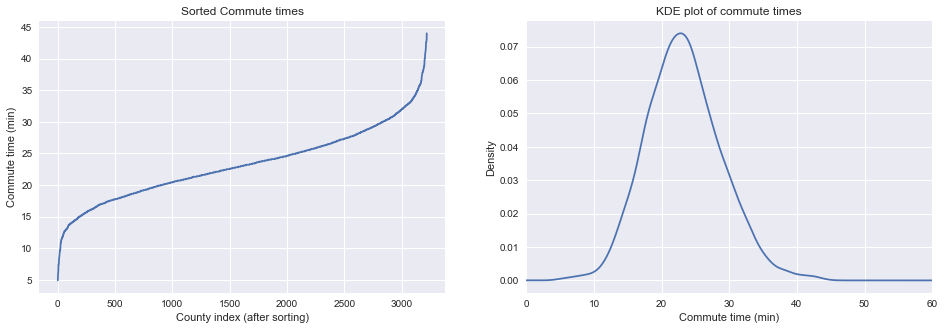

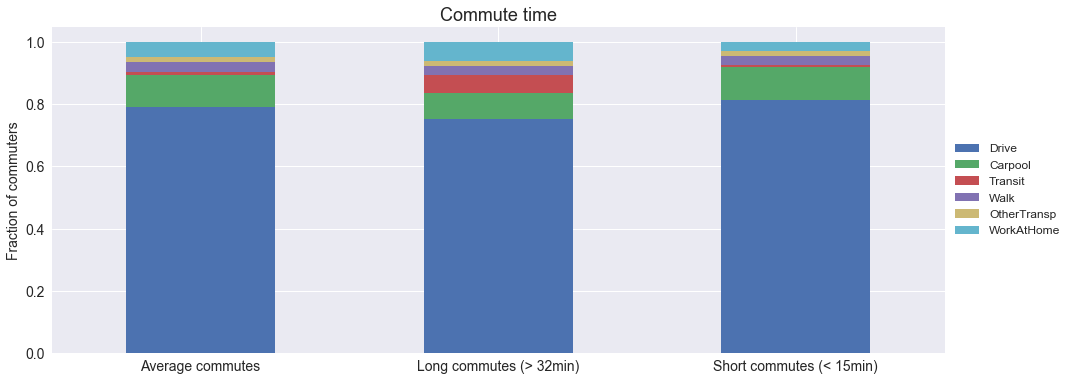

In [81]:
#########################   Commute Distribution Plots   #########################

fig, axarr = plt.subplots(1, 2, figsize=(16, 5))

commute_times = county.groupby(["State", "County"])["MeanCommute"].median().sort_values().values
axarr[0].plot(commute_times)
axarr[0].set(title="Sorted Commute times", xlabel="County index (after sorting)", ylabel="Commute time (min)")

_ = (
        county
            .groupby(["State", "County"])["MeanCommute"]
            .median()
            .sort_values()
            .plot(kind="kde", ax=axarr[1])
            .set(title="KDE plot of commute times", xlabel="Commute time (min)", xlim=(0,60))
)
plt.show()

#########################   Commute Transportation Plots   #########################

trans = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', "WorkAtHome"]

pd.DataFrame({
    "Short commutes (< 15min)":  low[trans].sum(axis=0) / low[trans].sum(axis=0).sum(),
    "Average commutes":  mid[trans].sum(axis=0) / mid[trans].sum(axis=0).sum(),
    "Long commutes (> 32min)": high[trans].sum(axis=0) / high[trans].sum(axis=0).sum()
}).transpose().plot(kind="bar", rot=0, stacked=True, fontsize=14, figsize=(16, 6))

plt.ylabel("Fraction of commuters", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
_ = plt.title("Commute time", fontsize=18)

<a name="fun"></a>
# [^](#toc) <u>Focus on Fun!</u>

### Longest and Shortest County names

In [82]:
longest_county_name_on_census_dataset_index = np.argmax(county.County.map(len))
s_i = np.argmin(county.County.map(len))

county[(county.index == longest_county_name_on_census_dataset_index) | (county.index == s_i)]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,trans_method
40,1081,Alabama,Lee,150982,74277,76705,3.7,68.2,23.0,0.1,...,1.0,3.1,21.7,68614,75.5,20.3,4.1,0.1,7.3,332160.4
88,2198,Alaska,Prince of Wales-Hyder Census Area,6376,3468,2908,3.2,46.0,0.2,40.3,...,7.3,4.6,14.0,2819,50.4,37.7,11.8,0.1,13.9,129432.8


### Largest 'Income' and 'IncomePerCap' errors

I wonder if this indicates high income inequality

In [83]:
max_income_err  = county[county.IncomeErr == max(county.IncomeErr)]
max_income_place = (max_income_err.County + ", " + max_income_err.State).sum()

max_per_cap_err = county[county.IncomePerCapErr == max(county.IncomePerCapErr)]
max_per_cap_place = (max_per_cap_err.County + ", " + max_per_cap_err.State).sum()

print("The County with the biggest income error is: {}{}{}".format(color.BOLD, max_income_place, color.END),
      "with an error of:", color.BOLD, "$" + str(max_income_err.IncomeErr.median()), color.END)
print("The County with the biggest income per cap error is: {}{}{}".format(color.BOLD, max_per_cap_place, color.END),
      "with an error of:", color.BOLD, "$" + str(max_per_cap_err.IncomeErr.median()), color.END)

The County with the biggest income error is: King, Texas with an error of:  $21355.0 
The County with the biggest income per cap error is: Borden, Texas with an error of:  $8208.0 


<a name="fun_gender"></a>
### [^](#toc) <u>Gender imbalance</u>

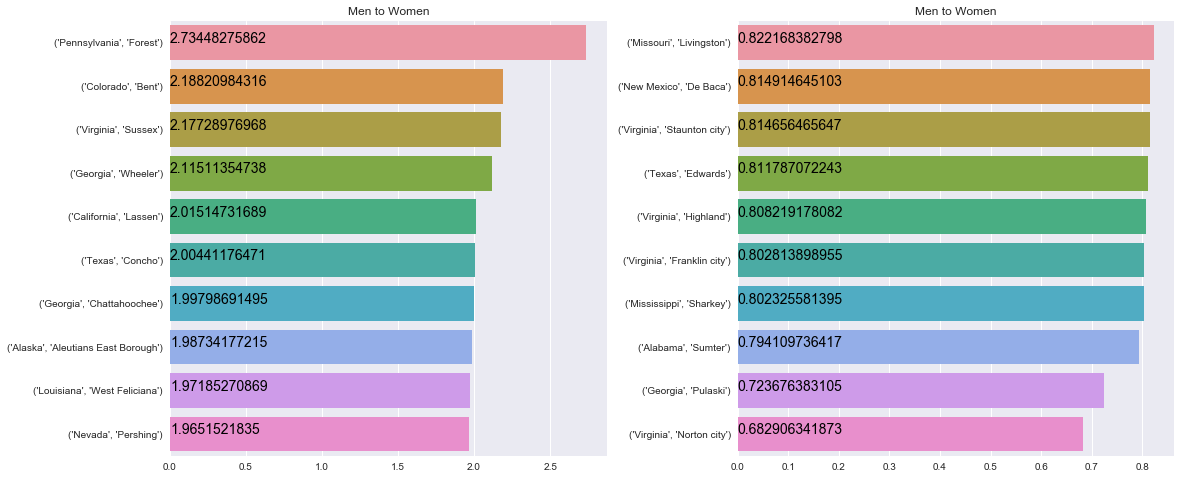

In [84]:
county["Men to women"] = county.Men / county.Women
ratio = county.groupby(["State", "County"])["Men to women"].median().sort_values(ascending=False)

fig, axarr = plt.subplots(1, 2, figsize=(18,8))
fig.subplots_adjust(wspace=0.3)

pretty_bar(ratio.head(10), axarr[0], title="Men to Women")
pretty_bar(ratio.tail(10), axarr[1], title="Men to Women")

<a name="fun_selected"></a>
## [^](#toc) <u>Selected Counties</u>

In [85]:
### Counties in California

state = "California"
county[county.State == state].County.unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced',
       'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer',
       'Plumas', 'Riverside', 'Sacramento', 'San Benito', 'San Bernardino',
       'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta',
       'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter',
       'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba'], dtype=object)

#### Setup

In [94]:
counties = ["Santa Clara", "San Diego", "Monterey", "Alameda", "San Francisco", "Contra Costa", "Los Angeles"]

commute, income, income_percap, men, women = ([],[],[],[],[])
hispanic, white, black, native, asian, pacific = ([],[],[],[],[],[])

def total_race(df, race):
    total_pop = df[race] * df.TotalPop
    frac_pop = (total_pop / 100).sum()
    return int(frac_pop)
    
for c in counties:
    curr_county = county[county.County == c]

    commute.append(curr_county.MeanCommute.median())
    men.append(   int(curr_county.Men.median())   )
    women.append( int(curr_county.Women.median()) )
    hispanic.append( total_race(curr_county, "Hispanic") )
    white.append(    total_race(curr_county, "White")    )
    black.append(    total_race(curr_county, "Black")    )
    native.append(   total_race(curr_county, "Native")   )
    asian.append(    total_race(curr_county, "Asian")    )
    pacific.append(  total_race(curr_county, "Pacific")  )
    income.append(curr_county.Income.median())
    income_percap.append(curr_county.IncomePerCap.median())

counties = pd.DataFrame({
                "Women": women, "Men": men, "Median Commute": commute,
                "Hispanic": hispanic, "White": white, "Black": black,
                "Native": native, "Asian": asian, "Pacific": pacific,
                "IncomePerCap": income_percap, "Income": income
            }, index=counties)

counties["Men to women"] = counties.Men / counties.Women
counties.head()

,Asian,Black,Hispanic,Income,IncomePerCap,Median Commute,Men,Native,Pacific,White,Women,Men to women
Santa Clara,625829,44835,496927,96310.0,43880.0,26.3,939004,3736,5604,627698,929145,1.010611
San Diego,360986,151485,1060398,64309.0,31266.0,25.0,1618945,12892,12892,1514855,1604151,1.009222
Monterey,25278,11139,243782,58783.0,24994.0,22.3,219299,1285,2142,134958,209142,1.048565
Alameda,435870,179103,358206,75619.0,37285.0,30.7,776699,4754,12679,523044,808284,0.960923
San Francisco,281655,44560,128636,81294.0,52220.0,31.7,427909,1681,3363,346394,412854,1.036466


#### Comparison

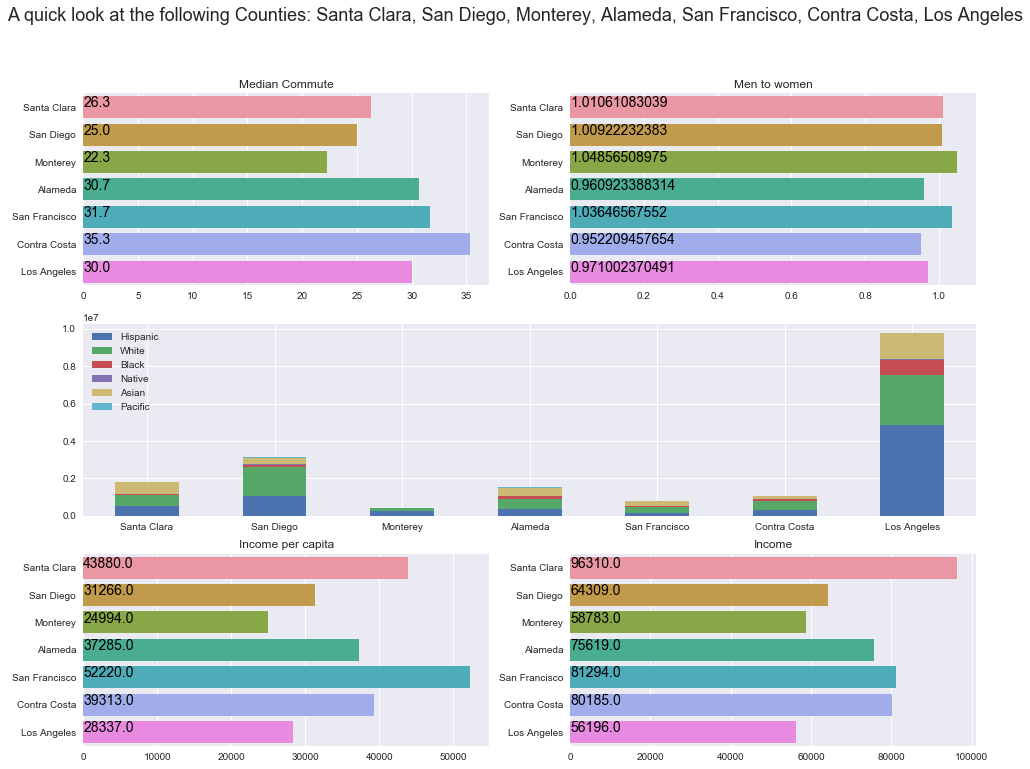

In [95]:
plt.figure(figsize=(16, 12))

ax1 = plt.subplot2grid((3, 2), (0, 0))
ax2 = plt.subplot2grid((3, 2), (0, 1))
ax3 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
ax4 = plt.subplot2grid((3, 2), (2, 0))
ax5 = plt.subplot2grid((3, 2), (2, 1))

plt.suptitle("A quick look at the following Counties: {}".format(", ".join(counties.index)), fontsize=18)

pretty_bar(counties["Median Commute"], ax1, title="Median Commute")
pretty_bar(counties["Men to women"], ax2, title="Men to women")

races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
counties[races].plot(kind="bar", stacked=True, ax=ax3, rot=0)

pretty_bar(counties["IncomePerCap"], ax4, title="Income per capita")
pretty_bar(counties["Income"], ax5, title="Income")

<a name="resources"></a>
# [^](#toc) <u>Resources</u>

- The American Community Survey website ([link](https://www.census.gov/programs-surveys/acs/))
- The American Community Survey Information Guide ([link](https://www.census.gov/programs-surveys/acs/about/information-guide.html))
- Here is the dataset for this project ([link](https://www.kaggle.com/muonneutrino/us-census-demographic-data)).  Thank you again to [MuonNeutrino](https://www.kaggle.com/muonneutrino) and [Kaggle](https://www.kaggle.com/)


<a name="criticism"></a>
# [^](#toc) <u>Criticism</u>

- To my fellow Americans: take a guess who would be first! ([link](https://www.lewrockwell.com/2004/07/ron-paul/its-none-of-your-business/))
- How accurate is the data?  Many people flat out refuse to answer any [questions](https://www.youtube.com/watch?v=bYwdOxOBwgM).
- The estimated budget for 2019 is $3.8 billion ([link to census budget](https://www2.census.gov/about/budget/2019-Budget-Infographic-Bureau-Summary.pdf)).
- Here is a [sample form](https://www2.census.gov/programs-surveys/acs/methodology/questionnaires/2018/quest18.pdf) from 2018, you can decide how invasive the questions are for yourself